# Exoplanet Classification using Cumulative Object of Interest Data

- Linear SVC
- KNN Classifier
- SVC 
- Ensemble Classifier
- Logistic Regression

Make sure to implement:
- cross validation
- gridsearchCV

Make sure to consider:
- Scaling
- feature importance
- accuracy, precision, recall
- yellowbrick classification visualizations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 75)

### Read Data

In [2]:
cumulativeOOI = pd.read_csv('./cumulativeooi.csv')

In [3]:
cumulativeOOI.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,...,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Active,8/16/2018,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,616.0,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,...,1.111110e+31,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Active,8/16/2018,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,875.0,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,...,1.111110e+31,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Active,8/16/2018,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10800.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,...,1.111110e+31,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Active,8/16/2018,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8080.0,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,...,1.111110e+31,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Active,8/16/2018,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,171.595550,2455004.596,0.0,NaN,0.701,1.65450,NaN,603.0,0.024064,1.98635,LS+MCMC,2.75,0.0374,85.41,1406.0,926.16,8.750,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2844,...,1.111110e+30,0.3090,Mandel and Agol (2002 ApJ 580 171)

In [4]:
cumulativeOOI.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_model_dof,koi_model_chisq,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9201.0,0.0,9201.000000,9564.000000,0.0,9.201000e+03,9201.000000,9243.000000,9201.000000,9201.000000,9200.000000,9201.000000,9.243000e+03,9201.000000,9201.0,9201.0,9201.000000,9201.000000,8422.000000,8422.000000,9201.000000,9564.000000,8422.000000,9218.000000,8.422000e+03,8054.000000,0.0,0.0,9201.000000,9201.000000,9178.000000,9201.000000,9201.000000,0.0,9564.000000,9564.000000,9563.000000,9523.000000,9555.000000,9410.000000,8951.000000,9539.000000,9539.000000,9539.00000,8488.000000,9058.000000,9058.000000,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,0.0,NaN,0.735105,5.621606,NaN,2.379245e+04,0.283646,9.164414,102.891778,0.223989,82.469147,1085.385828,7.745737e+03,76.736333,0.0,0.0,0.254439,0.407617,176.846052,1025.664672,259.895001,1.406315,385.006768,1.243654,9.151387e+30,0.409500,NaN,NaN,5706.823280,4.310157,-0.124431,1.728712,1.023706,NaN,292.060163,43.810433,14.264606,14.830501,14.221565,14.075138,13.991724,12.993311,12.620604,12.54341,0.150994,19.471356,43.829239,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,0.0,NaN,3.348832,6.471554,NaN,8.224316e+04,3.306558,53.807967,3077.639126,0.566359,15.223627,856.351161,1.592047e+05,845.274598,0.0,0.0,0.064806,0.106076,770.902357,4154.121620,795.806615,0.873289,545.756200,0.664573,4.153749e+30,0.500793,NaN,NaN,796.857947,0.432606,0.282111,6.127185,0.349447,NaN,4.766657,3.601243,1.385448,1.501885,1.383713,1.292573,1.230351,1.291912,1.267215,1.26818,0.252648,0.319158,3.599553,20.254777,20.534655,0.058225,0.092987,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,NaN,0.000000,0.052000,NaN,0.000000e+00,0.001289,0.000040,0.080000,0.005900,2.290000,25.000000,0.000000e+00,0.373000,0.0,0.0,-0.120600,0.125400,2.417437,7.105086,0.000000,1.000000,0.000000,1.000000,1.000000e+15,-1.000000,NaN,NaN,2661.000000,0.047000,-2.500000,0.109000,0.000000,NaN,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,6.702000,4.097000,3.014000,2.31100,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,0.0,NaN,0.197000,2.437750,NaN,1.600000e+02,0.012341,0.229250,1.400000,0.037700,83.920000,539.000000,2.015000e+01,5.358000,0.0,0.0,0.228600,0.326800,3.997856,10.733030,12.000000,1.000000,41.000000,1.000000,1.111100e+31,0.134650,NaN,NaN,5310.000000,4.218000,-0.260000,0.829000,0.845000,NaN,288.660770,40.777173,13.440000,13.896500,13.393000,13.294000,13.276000,12.253000,11.914500,11.84300,0.000000,19.243889,40.798688,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.

In [5]:
cumulativeOOI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2299 non-null object
koi_disposition      9564 non-null object
koi_vet_stat         9564 non-null object
koi_vet_date         9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_disp_prov        9564 non-null object
koi_comment          8355 non-null object
koi_period           9564 non-null float64
koi_time0bk          9564 non-null float64
koi_time0            9564 non-null float64
koi_eccen            9201 non-null float64
koi_longp            0 non-null float64
koi_impact           9201 non-null float64
koi_duration 

#### Drop Features
Features with the following characteristics will be dropped from the dataset:
- all NULL or Zeroes
- categorial features which offer no predictive ability
- inject leakage

In [6]:
#Drop Columns with all zeroes
cumulativeOOI = cumulativeOOI.drop(['koi_longp', 'koi_ingress', 'koi_model_dof', 'koi_model_chisq', 'koi_sage'], axis=1)

In [7]:
#Drop attributes with no predictive capability
cumulativeOOI = cumulativeOOI.drop(['rowid', 'kepoi_name', 'koi_comment', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs'], axis=1)

In [8]:
#Drop Columns which inject Leakage
cumulativeOOI = cumulativeOOI.drop(['koi_pdisposition', 'kepler_name', 'koi_score'], axis=1)

In [9]:
#Drop other categorical columns for first pass modeling
cumulativeOOI = cumulativeOOI.drop(['koi_tce_delivname', 'koi_sparprov'], axis=1)

### Uniqueness
The uniques of each column will be examined as well.  Columns with low or zero variance will be removed from the dataset.

In [10]:
df = cumulativeOOI.nunique(dropna = False)
print(df)

kepid               8214
koi_disposition        3
koi_vet_stat           1
koi_vet_date           1
koi_fpflag_nt          3
koi_fpflag_ss          2
koi_fpflag_co          2
koi_fpflag_ec          2
koi_disp_prov          1
koi_period          9564
koi_time0bk         9538
koi_time0           7445
koi_eccen              2
koi_impact          2407
koi_duration        7834
koi_depth           2854
koi_ror             8503
koi_srho            9003
koi_fittype            4
koi_prad            2989
koi_sma             3797
koi_incl            2261
koi_teq             2512
koi_insol           7802
koi_dor             6211
koi_ldm_coeff4         2
koi_ldm_coeff3         2
koi_ldm_coeff2      1081
koi_ldm_coeff1      1323
koi_max_sngle_ev    8422
koi_max_mult_ev     8423
koi_model_snr       2741
koi_count              7
koi_num_transits    1628
koi_tce_plnt_num       9
koi_quarters         118
koi_bin_oedp_sig    4876
koi_steff           2446
koi_slogg           1558
koi_smet             120


In [11]:
#Drop Columns with zero or near zero variance
cumulativeOOI = cumulativeOOI.drop(['koi_vet_stat', 'koi_vet_date', 'koi_disp_prov', 'koi_ldm_coeff3', 'koi_ldm_coeff4'], axis=1)

In [12]:
#cumulativeOOI.koi_ldm_coeff4.unique()

#### One Hot Encoding of koi_fittype

In [13]:
#Creating Dummy variables for categorical variable 'Primary' positions
#df2 = pd.get_dummies(df.Primary,prefix='Prim', prefix_sep='_')
#df = df.join(df2, how='inner')
#df.drop(['Primary'], axis=1, inplace=True)
fittypeEncode = pd.get_dummies(cumulativeOOI.koi_fittype, prefix="ENC", prefix_sep="_")
cumulativeOOI = cumulativeOOI.join(fittypeEncode, how='inner')
cumulativeOOI.drop(['koi_fittype'], axis=1, inplace=True)

#### Label Substitution for koi_disposition
- False Positive = 0
- Confirmed = 1
- Candidate = 2

In [14]:
print(np.unique(cumulativeOOI.koi_disposition))

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


In [15]:
l = 'koi_disposition'

label = 2
counter = 0
tmpArray = np.unique(cumulativeOOI[l])
    
for t in tmpArray:
    print(l, tmpArray[label], counter)
    cumulativeOOI[l] = np.where(cumulativeOOI[l] == tmpArray[label], counter, cumulativeOOI[l])
    counter += 1
    label -= 1


koi_disposition FALSE POSITIVE 0
koi_disposition CONFIRMED 1
koi_disposition CANDIDATE 2


### Missing Values

#### Missing Values Function
Most machine learning algorithms do not accomodate to missing values.  The amount and degree of missingness is assesed below.

In [16]:
def rptMissingValues(df):
    try:
        del df2
    except:
        pass
    
    df2 = df.isnull().sum()
    df2 = df2[df2 > 0]
    df2 = pd.DataFrame({
        'n Missing' : df2,
        '% Missing' : ((df2 / df.shape[0])*100).round(2)})

    cm = sns.light_palette("red", as_cmap=True)
    df2.style.background_gradient(cmap=cm)
    return df2.style.background_gradient(cmap=cm);

In [17]:
mv = rptMissingValues(cumulativeOOI)
mv

,% Missing,n Missing
koi_eccen,3.8,363
koi_impact,3.8,363
koi_depth,3.8,363
koi_ror,3.8,363
koi_srho,3.36,321
koi_prad,3.8,363
koi_sma,3.8,363
koi_incl,3.81,364
koi_teq,3.8,363
koi_insol,3.36,321


#### Fill Missing Values with Zeroes
One simple approach to solving for missing values is to fill all NULLs with zero.  If the missing values are valid missing values, this could be a good approach to solve for this issue.  However, filling all NULLs with zero could have adverse impacts when classifying data which is not part of the training dataset.

In [18]:
cumulativeFill = cumulativeOOI.fillna(value=0)

mv2 = rptMissingValues(cumulativeFill)
mv2

,% Missing,n Missing


Kepler object of interest 2306756 has several missing values.  It will be spot checked to verify missing values where correctly filled.

In [19]:
cumulativeFill[cumulativeFill.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756,0,0,1,0,0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,0.0,0.0,994.0,1,0.0,1.0,0.0,0.0,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0,0,1,0


In [20]:
cumulativeOOI[cumulativeOOI.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756,0,0,1,0,0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,NaN,NaN,994.0,1,NaN,1.0,NaN,NaN,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0,0,1,0


#### Fill Missing Values Using Multiple Imputation
Multiple imputation is an advanced technique to deal with missingness in datasets.  Multiple Imputation techniques seek to fill missing values with a value that preserves the natural variance of the dataset.  This can be advantageous as it minimizes bias when imputing data.  In this case, the fancyimpute package will utilize the K-nearest-neighbors algorithm to algorithmically fill missing values.

In [21]:
from fancyimpute import KNN as fiKNN

dfCols = cumulativeOOI.columns
cumulativeMice = pd.DataFrame(fiKNN(k=83).complete(cumulativeOOI))
cumulativeMice.columns = dfCols

Imputing row 1/9564 with 0 missing, elapsed time: 38.263
Imputing row 101/9564 with 0 missing, elapsed time: 38.269
Imputing row 201/9564 with 2 missing, elapsed time: 38.272
Imputing row 301/9564 with 0 missing, elapsed time: 38.273
Imputing row 401/9564 with 0 missing, elapsed time: 38.286
Imputing row 501/9564 with 0 missing, elapsed time: 38.299
Imputing row 601/9564 with 0 missing, elapsed time: 38.312
Imputing row 701/9564 with 0 missing, elapsed time: 38.317
Imputing row 801/9564 with 0 missing, elapsed time: 38.323
Imputing row 901/9564 with 0 missing, elapsed time: 38.332
Imputing row 1001/9564 with 0 missing, elapsed time: 38.346
Imputing row 1101/9564 with 0 missing, elapsed time: 38.349
Imputing row 1201/9564 with 0 missing, elapsed time: 38.353
Imputing row 1301/9564 with 0 missing, elapsed time: 38.360
Imputing row 1401/9564 with 0 missing, elapsed time: 38.362
Imputing row 1501/9564 with 0 missing, elapsed time: 38.365
Imputing row 1601/9564 with 1 missing, elapsed time:

No missing values exist after multiple imputation.

In [22]:
mv3 = rptMissingValues(cumulativeMice)
mv3

,% Missing,n Missing


Spot check object of interest 2306756 to verify all missing values have been filled.

In [23]:
cumulativeMice[cumulativeMice.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756.0,0.0,0.0,1.0,0.0,0.0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,27.065371,132.087117,994.0,1.0,384.611062,1.0,9.508400e+30,0.477568,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0.0,0.0,1.0,0.0


### Create Test and Train Data Sets

Test and Train data sets are created to facilitate model development and predictions.  The models will be built using the training data sets.  The training data set contains all objects of interest which have already been classified by NASA.  This will allow for the machine learning model to be tuned using known outcomes.  All objects of interest with a koi_disposition of "CANDIDATE" have not yet been confirmed as being an exoplanet.  These observations will become the test dataset where a probability of being a exoplanet will be assigned using the model built using the train data set.  

In [24]:
#Create Test and Train Data Sets

##cumulativeOOI
exoTest = cumulativeOOI[cumulativeOOI.koi_disposition == 2]
exoTrain = cumulativeOOI[cumulativeOOI.koi_disposition != 2]

##cumulativeFill
exoTestFill = cumulativeFill[cumulativeFill.koi_disposition == 2]
exoTrainFill = cumulativeFill[cumulativeFill.koi_disposition != 2]

##cumulativeMice
exoTestMice = cumulativeMice[cumulativeMice.koi_disposition == 2]
exoTrainMice = cumulativeMice[cumulativeMice.koi_disposition != 2]

Verify the shape of test and train datasets to assure the expected number of records and columns exist in each.

In [25]:
print("exoTest Shape", exoTest.shape)
print("exoTrain Shape", exoTrain.shape)

print("exoTestFill Shape", exoTestFill.shape)
print("exoTrainFill Shape", exoTrainFill.shape)

print("exoTestMice Shape", exoTestMice.shape)
print("exoTrainMice Shape", exoTrainMice.shape)

exoTest Shape (2426, 63)
exoTrain Shape (7138, 63)
exoTestFill Shape (2426, 63)
exoTrainFill Shape (7138, 63)
exoTestMice Shape (2426, 63)
exoTrainMice Shape (7138, 63)


Split the response (y) and explantory (X) features in preparation of model training.  Save the kepler ID for the test and train datasets for future use.  The disposition and kepler ID will then be dropped as these inject leakage into the model.

In [26]:
#Split X, y / explantory, reponse variables

#save kepid
exoTestX_kepid = exoTest.kepid
exoTrainX_kepid = exoTrain.kepid

##cumulativeOOI
exoTestY = exoTest.koi_disposition
exoTestX = exoTest.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainY = exoTrain.koi_disposition
exoTrainX = exoTrain.drop(['koi_disposition', 'kepid'], axis=1)

svCols = exoTrainX.columns

##cumulativeFill
exoTestFillY = exoTestFill.koi_disposition
exoTestFillX = exoTestFill.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainFillY = exoTrainFill.koi_disposition
exoTrainFillX = exoTrainFill.drop(['koi_disposition', 'kepid'], axis=1)

##cumulativeMice
exoTestMiceY = exoTestMice.koi_disposition
exoTestMiceX = exoTestMice.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainMiceY = exoTrainMice.koi_disposition
exoTrainMiceX = exoTrainMice.drop(['koi_disposition', 'kepid'], axis=1)

In [27]:
len(svCols)

61

## Support Vector Machine


Scale the data.

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt

#Scale Data
scaler = StandardScaler()
scaledTestFillX = scaler.fit_transform(exoTestFillX)
scaledTrainFillX = scaler.fit_transform(exoTrainFillX)
scaledTestMiceX = scaler.fit_transform(exoTestMiceX)
scaledTrainMiceX = scaler.fit_transform(exoTrainMiceX)

Convert the scaled data back to dataframes with the correct column headers.

In [29]:
#Convert scaled objects to dataframes
df_scaledTestFillX = pd.DataFrame(scaledTestFillX, columns=svCols)
df_scaledTrainFillX = pd.DataFrame(scaledTrainFillX, columns=svCols)
df_scaledTestMiceX = pd.DataFrame(scaledTestMiceX, columns=svCols)
df_scaledTrainMiceX = pd.DataFrame(scaledTrainMiceX, columns=svCols)

Save the scaled dataframes to pickle files for future use.  This also allows us the ability to skip the data cleansing portion of the program if necessary.

In [30]:
#Save to pickle files
##Zero Filled DataFrames
df_scaledTestFillX.to_pickle('./df_scaledTestFillX.pkl')
df_scaledTrainFillX.to_pickle('./df_scaledTestFillX.pkl')
##MICE filled Dataframes
df_scaledTestMiceX.to_pickle('./df_scaledTestMiceX.pkl')
df_scaledTrainMiceX.to_pickle('./df_scaledTrainMiceX.pkl')

Spot check the scaled dataframe.

In [31]:
df_scaledTrainMiceX.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
0,-0.050642,-0.672744,-0.599898,-0.437782,-0.381155,0.121114,0.121118,0.0,-0.191773,-0.410556,-0.327825,-0.088493,-0.082259,-0.032953,-0.369817,0.528955,-0.417069,-0.053892,-0.216185,-0.413408,0.524848,-0.246799,-0.266899,-0.333146,0.664082,-0.497914,-0.355406,0.485948,0.581059,-0.334384,0.369605,0.977938,-0.135324,-0.307612,-0.047347,1.236997,0.785766,0.712524,0.762694,0.812208,0.861562,0.844909,0.891242,0.871882,-0.573011,-0.044485,1.237201,0.034609,0.047893,-0.000725,0.002980,0.003041,0.088529,-0.586695,0.038529,0.142112,-0.542492,-0.104427,0.412742,-0.32948,-0.195588
1,-0.050642,-0.672744,-0.599898,-0.437782,0.013289,-0.004602,-0.004600,0.0,-0.055849,-0.188747,-0.325031,-0.086738,-0.085916,-0.032776,0.267632,0.523538,-0.801560,-0.054358,0.145585,-0.413408,0.524848,-0.244535,-0.268760,-0.344364,0.664082,-0.707206,1.246530,0.485948,-0.767106,-0.334384,0.369605,0.977938,-0.135324,-0.307612,-0.047347,1.236997,0.785766,0.712524,0.762694,0.812208,0.861562,0.844909,0.891242,0.871882,-0.568559,-0.044577,1.237223,-0.011659,0.060382,0.012621,-0.001874,0.157339,0.016723,-0.527572,0.196293,0.073679,-0.486625,-0.104427,0.412742,-0.32948,-0.195588
2,-0.050642,1.486450,-0.599898,-0.437782,-0.449202,0.117493,0.117499,0.0,0.157306,-0.489444,-0.247302,0.025717,-0.141542,-0.023270,-0.568405,-0.829372,0.244256,-0.049481,-0.362909,0.475996,-0.461441,-0.206197,-0.152599,0.193865,-0.452577,0.358929,-0.355406,0.485948,-0.771639,0.091986,0.589480,-1.365194,-0.156704,-0.540428,-1.393939,1.277212,0.962816,0.850083,0.964216,1.017147,1.075407,1.030458,1.015123,0.996578,-0.581915,-1.400747,1.277345,0.010995,0.007496,0.049245,-0.005466,-0.089152,0.069500,-0.559000,-0.091145,0.066115,-0.556148,-0.104427,0.412742,-0.32948,-0.195588
3,-0.050642,-0.672744,-0.599898,-0.437782,-0.442278,0.137670,0.137677,0.0,-0.020323,-0.597079,-0.327965,-0.087955,-0.106503,-0.032801,-0.532144,0.273178,0.256340,-0.049292,-0.325622,0.443457,-0.362529,-0.247260,-0.265848,-0.327425,-0.452577,0.169315,-0.355406,-2.007459,-0.162688,0.367299,0.303869,0.729424,-0.116616,0.186070,-0.716338,1.260682,0.900494,0.794404,0.903192,0.948324,1.054845,1.060875,1.133585,1.107332,2.681568,-0.718293,1.260831,0.015403,0.017315,0.003620,0.007639,0.018471,-0.015590,-0.617812,0.034682,0.037661,-0.620085,-0.104427,0.412742,-0.32948,-0.195588
4,-0.050642,-0.672744,-0.599898,-0.437782,-0.367053,0.131491,0.131489,0.0,-0.070677,-0.176222,-0.318072,-0.083977,-0.132563,-0.032444,-0.322711,0.435671,-0.370930,-0.053774,-0.273765,0.513184,-0.503831,-0.242119,-0.260947,-0.298708,1.780740,-0.581989,-0.355406,-2.007461,-0.579494,0.385572,0.412673,0.196894,-0.128250,0.068260,0.868369,1.260253,1.045675,0.937858,1.051495,1.101264,1.219341,1.184067,1.171523,1.246744,0.077339,0.877728,1.260397,0.010602,0.013439,0.002999,-0.196622,0.022328,-0.008409,-0.624035,0.000050,0.001643,-0.616981,-0.104427,0.412742,-0.32948,-0.195588


### GridSearchCV
GridSearchCV is used to identify the optimal combination of parameters to use in out support vector machine model.  The ShuffleSplit cross validation object used in the remainder of the notebook is created here as well.

In [32]:
#GridSearchCV SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_validate, StratifiedKFold, StratifiedShuffleSplit

#Create Cross Validation Objects
cvss = ShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)
cvsss = StratifiedShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)
cv = StratifiedKFold(n_splits=10)

svcEstimator = SVC()

parameters = { 'kernel':['linear', 'poly', 'rbf']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'degree': [2, 3, 4]
              #,'class_weight':['dict', 'balanced', 'None']
              ,'random_state': [0]
              ,'gamma': ['auto']
             }

#Create a grid search object using the  
regGridSearch = GridSearchCV(estimator=svcEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # 
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(df_scaledTrainFillX, exoTrainFillY)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed: 14.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'random_state': [0], 'degree': [2, 3, 4], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

Print the best estimator and it's accuracy score for the zero filled data.

In [33]:
#regGridSearch exoTrainFillX data
print(regGridSearch.best_estimator_)
print(regGridSearch.best_score_.round(4))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.9888


Run GridSearchCV and print the best estimator and it's accuracy score for the Knn Imputed data.

In [34]:
#regGridSearch exoTrainMiceX data
regGridSearch.fit(df_scaledTrainMiceX, exoTrainMiceY)
print(regGridSearch.best_estimator_)
print(regGridSearch.best_score_.round(4))

##0.9878 @ fancy impute KNN = 10
##0.9885 @ fancy impute KNN = 21
##0.9885 @ fancy impute KNN = 83

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed: 15.0min finished


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.9873


### Recursive Feature Elimination
This dataset has a relatively high number of features.  Unedited it contains over eighty features.  This number was cut to 61 in the data cleansing routines.  Utilizing all 61 features to train the SVM model could result in overfitting and produced less than optimal results on the test data set or any new objects of interest in the future.  Recursive feature elimination will be used for the zero filled and Knn imputed datasets to determine which features are the most significant.

#### RFECV Function

In [35]:
from sklearn.feature_selection import RFECV

def f_rfecv(est, st, cv, score, verb, X, y):
    rfecv = RFECV(estimator=est, step=st, cv=cv, scoring=score, verbose=verb, n_jobs=6)
    rfecv.fit(X, y)
    print(rfecv.ranking_)
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.grid(b=True, which='both', axis='both')
    plt.show()
    print("Optimal number of features : %d" % rfecv.n_features_, "|| Score:", rfecv.grid_scores_.max().round(4))
    return;

#### RFECV df_scaledTrainFillX

In [36]:
%%time

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False), step=1, cv=cv, scoring='accuracy', verbose=0, n_jobs=12)
rfecv.fit(df_scaledTrainFillX, exoTrainFillY)
print(rfecv.ranking_)

[25  1  1  1 29 20 27 30  1  1  1  1  1  1  6  4  1 24  1  7 14  1  1  1
  1  1  1 15  9  1 22  2  1 12  8 18  1  5  1 19 23  1  1  1 26  1 17 16
  1  3  1 10 28  1 11  1  1 13  1 21  1]
CPU times: user 4min 6s, sys: 1.83 s, total: 4min 8s
Wall time: 26min


Chart showing the optimal number of features for the zero filled data set using accuracy to compare different feature combinations.

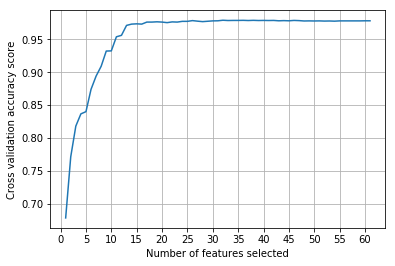

Optimal number of features : 32 || Score: 0.9793


In [37]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xticks(np.arange(0,61,5))
plt.grid(b=True, which='both', axis='both')
plt.show()
print("Optimal number of features : %d" % rfecv.n_features_, "|| Score:", rfecv.grid_scores_.max().round(4))

In [115]:
rfecv.grid_scores_

array([0.67820142, 0.77134496, 0.81802899, 0.83667019, 0.84003547,
       0.87405321, 0.89420955, 0.90920439, 0.93231893, 0.93259787,
       0.95403097, 0.95627344, 0.97140676, 0.97336853, 0.97378929,
       0.97336853, 0.97645192, 0.97645212, 0.97687249, 0.97645232,
       0.97561296, 0.97673439, 0.97645428, 0.97757571, 0.97757552,
       0.97869636, 0.97785425, 0.97715378, 0.97771538, 0.97827599,
       0.97841605, 0.97925678, 0.97883681, 0.97897667, 0.97897667,
       0.97911633, 0.97883602, 0.97911672, 0.97883661, 0.97897686,
       0.97883661, 0.97897627, 0.97841546, 0.97869577, 0.97841546,
       0.97897568, 0.97869498, 0.97813476, 0.97827481, 0.97813495,
       0.97827462, 0.97799451, 0.97813476, 0.97785445, 0.97827462,
       0.97827462, 0.97827462, 0.97827462, 0.97827462, 0.97841467,
       0.97841467])

While the output of recursive feature eliminations show 32 features as producing the best accuracy score, examination of the results shows 17 features produces a high accuracy score with almost half the number of features.  The lower number of features will be used going forward to create a more generalized model.  The top features are identified and printed.

In [123]:
#17 features has same score as 32 features
#print(rfecv.grid_scores_[16], rfecv.grid_scores_[31])
#0.9871148459383754 0.9871148459383754

#https://stackoverflow.com/questions/51181170/selecting-a-specific-number-of-features-via-sklearns-rfecv-recursive-feature-e
#n = rfecv.n_features_ #optimal number of features Identified by algorithm
n = 17 # to select top features
feature_ranks = rfecv.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]
top_n_features = exoTrainFillX.iloc[:1, top_n_idx]
top_n_features

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_teq,koi_dor,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num
0,0,0,0,0.146,2.9575,616.0,0.022344,3.20796,2.26,793.0,24.81,5.135849,28.47082,35.8,2,142.0,1.0


Create dataframe containing the top features from the zero filled dataset.

In [124]:
#Create Zero Fill dataframe for only the top features
df_rfecvTrainFillX = df_scaledTrainFillX.iloc[:, top_n_idx]
df_rfecvTestFillX = df_scaledTestFillX.iloc[:, top_n_idx]
df_rfecvTrainFillX.shape

(7138, 17)

In [125]:
#Save to Pickle Files
df_rfecvTrainFillX.to_pickle('./df_rfecvTrainFillX.pkl')
df_rfecvTestFillX.to_pickle('./df_rfecvTestFillX.pkl')

#### RFECV df_scaledTrainMiceX

In [76]:
%%time

from sklearn.feature_selection import RFECV

rfecvMice = RFECV(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False), step=1, cv=cvsss, scoring='accuracy', verbose=0, n_jobs=12)
rfecvMice.fit(df_scaledTrainMiceX, exoTrainMiceY)
print(rfecvMice.ranking_)

[ 9  1  1  1  5 11 13 15  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1
  1  1  1  1  3  1  2  1  1  4  1 10  1  1  1  1  1  1  1  1 14  1  6  8
  1  1  1  1  7  1  1  1  1  1  1  1  1]
CPU times: user 2min 51s, sys: 878 ms, total: 2min 52s
Wall time: 14min 59s


RFECV (using stratified shuffle split cross validation) identifies the optimal number of features being 47 for the Knn imputed dataset.  However, the chart show the accuracy showing relatively small improvements after approximately 20 features.  A second inflection point can be seen at approximately 14 features as well.  The top 14 or 20 features may be a good number for the Knn imputed dataset to create a generalized model.  

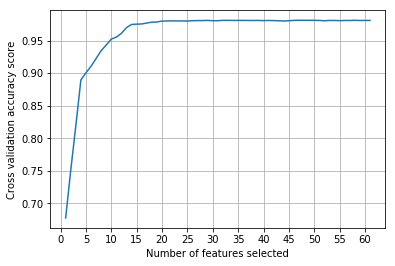

Optimal number of features : 47 || Score: 0.9812


In [77]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, len(rfecvMice.grid_scores_) + 1), rfecvMice.grid_scores_)
plt.xticks(np.arange(0,61,5))
plt.grid(b=True, which='both', axis='both')
plt.show()
print("Optimal number of features : %d" % rfecvMice.n_features_, "|| Score:", rfecvMice.grid_scores_.max().round(4))

In [64]:
rfecvMice.grid_scores_

array([0.67787115, 0.75091036, 0.81904762, 0.88956583, 0.90056022,
       0.9105042 , 0.92247899, 0.93452381, 0.94313725, 0.95231092,
       0.95532213, 0.96113445, 0.96995798, 0.97471989, 0.97514006,
       0.9754902 , 0.97689076, 0.97822129, 0.97843137, 0.97990196,
       0.97997199, 0.9802521 , 0.98011204, 0.98011204, 0.97997199,
       0.98046218, 0.98060224, 0.98067227, 0.98095238, 0.98039216,
       0.98046218, 0.98102241, 0.98102241, 0.98088235, 0.98088235,
       0.98095238, 0.98081232, 0.98081232, 0.98088235, 0.98060224,
       0.98081232, 0.98060224, 0.98039216, 0.98004202, 0.98039216,
       0.98095238, 0.98116246, 0.98109244, 0.98109244, 0.98102241,
       0.98088235, 0.98032213, 0.98088235, 0.98081232, 0.98053221,
       0.98081232, 0.98081232, 0.98109244, 0.98081232, 0.98088235,
       0.98088235])

Identify and print the top features for the Knn imputed dataset.

In [102]:
n = rfecvMice.n_features_ # to select top X features
#n=14
feature_ranks = rfecvMice.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]
top_n_features = exoTrainMiceX.iloc[:1, top_n_idx]
top_n_features

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_steff,koi_smet,koi_srad,ra,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
0,0.0,0.0,0.0,0.146,2.9575,616.0,0.022344,3.20796,2.26,89.66,793.0,93.59,24.81,0.2291,0.4603,5.135849,28.47082,35.8,2.0,142.0,1.0,1.111110e+31,5455.0,0.14,0.927,291.93423,15.347,15.89,15.27,15.114,15.006,14.082,13.751,13.648,19.462294,0.94,-0.0002,-0.00055,-0.01,0.2,0.08,0.31,0.32,0.0,1.0,0.0,0.0


Create dataframe containing the top features for the Knn Imputed dataset.

In [103]:
#Create MICE dataframe for only the top features
df_rfecvTrainMiceX = df_scaledTrainMiceX.iloc[:, top_n_idx]
df_rfecvTestMiceX = df_scaledTestMiceX.iloc[:, top_n_idx]
df_rfecvTrainMiceX.shape

(7138, 47)

In [104]:
#Save to Pickle Files
df_rfecvTrainMiceX.to_pickle('./df_rfecvTrainMiceX.pkl')
df_rfecvTestMiceX.to_pickle('./df_rfecvTestMiceX.pkl')

### SVM Cross Validated
The SVM model will be trained and scored for the zero filled and Knn imputed datasets.  The SVM model object using the best estimator from GridSearchCV is created below.

In [126]:
svm_clf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Generic function to train and score cross validated SVM models.

In [127]:
#SVM Cross Validation and scoring Function
def svmCV(X, y, desc):
    for train_indices, test_indices in cv.split(X, y): 
        X_train = X.iloc[train_indices]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_test = y.iloc[test_indices]
        svm_clf.fit(X_train, y_train)  # train object
        
    y_hat = svm_clf.predict(X_test) # get test set precitions

    print("===== SVM for", desc, "with Shuffle Split Cross Validation =====")
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test, y_hat)
    recall = mt.recall_score(y_test, y_hat)
    print('accuracy:', acc.round(4) )
    print('precision:', prec.round(4))
    print('recall:', recall.round(4))
    print(conf)
    return acc, conf, prec, recall;

Read pickle files created above.  This allows us to start in this section and bypass the time consuming data cleansing, parameter selection and feature selection steps.

In [128]:
#Read Pickle Files
try:
    del df_rfecvTrainFillX, df_rfecvTestFillX, df_rfecvTrainMiceX, df_rfecvTestMiceX
except Exception as e:
    print(e)
    
df_rfecvTrainFillX = pd.read_pickle("./df_rfecvTrainFillX.pkl")
df_rfecvTestFillX = pd.read_pickle("./df_rfecvTestFillX.pkl")
df_rfecvTrainMiceX = pd.read_pickle("./df_rfecvTrainMiceX.pkl")
df_rfecvTestMiceX = pd.read_pickle("./df_rfecvTestMiceX.pkl")

#### Train and score SVM for the zero filled dataset.

In [129]:
#df_scaledTrainFill with cross validation
svmCV(df_rfecvTrainFillX, exoTrainFillY, "Zero Filled Missing Data")
#n=17 accuracy: 0.9341
#n=32 accuracy: 0.9201

===== SVM for Zero Filled Missing Data with Shuffle Split Cross Validation =====
accuracy: 0.9341
precision: 0.8824
recall: 0.917
[[456  28]
 [ 19 210]]


(0.9340813464235624, array([[456,  28],
        [ 19, 210]]), 0.8823529411764706, 0.9170305676855895)

#### Prediction Post RFECV - Zero Fill

In [130]:
y_hatProbCandidates = svm_clf.predict_proba(df_rfecvTestFillX)

In [131]:
y_hatProbCandidates = pd.DataFrame(y_hatProbCandidates)
y_hatProbCandidates.describe()

,0,1
count,2426.000000,2.426000e+03
mean,0.720654,2.793465e-01
std,0.298869,2.988690e-01
min,0.000001,1.000000e-07
25%,0.524269,8.006921e-03
50%,0.823336,1.766643e-01
75%,0.991993,4.757314e-01
max,1.000000,9.999988e-01


In [132]:
np.where(y_hatProbCandidates[1] >= 0.5)
np.count_nonzero(np.where(y_hatProbCandidates[1] >= 0.5))

575

#### Train and score SVM for the Knn imputed dataset.

In [110]:
svmCV(df_rfecvTrainMiceX, exoTrainMiceY, "Knn Imputation")
#n=20 accuracy: 0.9215
#n=14 accuracy: 0.9215
#n=47 accuracy: 0.9299

===== SVM for Knn Imputation with Shuffle Split Cross Validation =====
accuracy: 0.9299
precision: 0.8623
recall: 0.9301
[[450  34]
 [ 16 213]]


(0.9298737727910238, array([[450,  34],
        [ 16, 213]]), 0.8623481781376519, 0.9301310043668122)

#### Prediction Post RFECV - Knn Imputation

In [111]:
df_rfecvTestMiceX.shape

(2426, 47)

In [112]:
y_hatProbCandidates = svm_clf.predict_proba(df_rfecvTestMiceX)

In [113]:
y_hatProbCandidates = pd.DataFrame(y_hatProbCandidates)
y_hatProbCandidates.describe()

,0,1
count,2426.000000,2.426000e+03
mean,0.868487,1.315126e-01
std,0.230876,2.308758e-01
min,0.003361,1.000000e-07
25%,0.856073,6.278393e-04
50%,0.985092,1.490777e-02
75%,0.999372,1.439269e-01
max,1.000000,9.966391e-01


In [114]:
np.where(y_hatProbCandidates[1] >= 0.5)
np.count_nonzero(np.where(y_hatProbCandidates[1] >= 0.5))

234

### Object of Interest Candidate Probabilities

#### Raw DataSet

#### Post Data Cleansing and Imputation

#### Post Scaling

In [93]:
#exoTestX_kepid

## Saved Code Appendix

####### changed to markdown since we have a function to train and score SVM
#df_scaledTrainFill with cross validation
for train_indices, test_indices in cv.split(df_rfecvTrainFillX, exoTrainFillY): 
    X_train = df_rfecvTrainFillX.iloc[train_indices]
    y_train = exoTrainFillY.iloc[train_indices]
    
    X_test = df_rfecvTrainFillX.iloc[test_indices]
    y_test = exoTrainFillY.iloc[test_indices]

svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions
y_hatProb = svm_clf.predict_proba(X_test)

print("===== SVM for Zero Filled Missing Data with Shuffle Split Cross Validation =====")
scoreSVM(y_test, y_hat)

####### changed to markdown since we have a function to train and score SVM
#df_scaledTrainMice with cross validation
for train_indices, test_indices in cv.split(df_rfecvTrainMiceX, exoTrainMiceY): 
    X_train = df_scaledTrainMiceX.iloc[train_indices]
    y_train = exoTrainMiceY.iloc[train_indices]
    
    X_test = df_scaledTrainMiceX.iloc[test_indices]
    y_test = exoTrainMiceY.iloc[test_indices]
    
svm_clf.fit(X_train, y_train)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions
y_hatProb = svm_clf.predict_proba(X_test)

print("===== SVM for KNN Imputed Missing Data with Shuffle Split Cross Validation =====")
scoreSVM(y_test, y_hat)